In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('GuitarModels.csv')

data = data.fillna('')

data.head()

,Maker,Model,Introduced,NotableUser1,NotableUser2,NotableUser3,Feature1,Feature2,Feature3,Feature4,Feature5,Popularity,Dates,Finish1,Finish2,Finish3,Finish4,Finish5
0,Fender,Bronco,1967,Johnny Winter,,,Short scale length (24 inches),Single pickup,Unique tremolo system,Offset body design,,Designed as a student model but has been used ...,"1967 - 1981, 1994 - 2001, 2011 - 2021",Fiesta Red,Sonic Blue,Dakota Red,,
1,Fender,Bullet,1981,,,,Designed as an affordable entry-level guitar,Single or dual single-coil pickups,Stratocaster-style body,Hardtail or tremolo bridge,,"Aimed at students and beginners, known for its...","1981 - 1983, 2007 - 2010",Arctic White,Fiesta Red,Black,,
2,Fender,Coronado,1965,Elvis Presley,Dave Davies,,Fully hollow body,DeArmond single-coil pickups,Bolt-on neck,Floating bridge with a trapeze tailpiece,,A departure from Fender's solid-body tradition...,"1966 - 1972, 2013 - 2017",Antigua,Cherry Red,Wildwood I,,
3,Fender,Cyclone,1997,,,,"Mix of Stratocaster, Mustang, and Jaguar features",Humbucker in the bridge and single-coil in the...,Short scale length (24.75 inches),Offset body design,,Versatile guitar popular among alternative roc...,1997 - 2012,Candy Apple Red,Sonic Blue,Lake Placid Blue,,
4,Fender,Duo-Sonic,1956,Jimi Hendrix,Rory Gallagher,,Short scale length (22.5 or 24 inches),Two single-coil pickups,"Simple, straightforward design",Offset body design,,Initially targeted at student guitarists but l...,"1956 - 1969, 1993 - 1999, 2016 - Present",Arctic White,Capri Orange,Torino Red,Desert Sand,


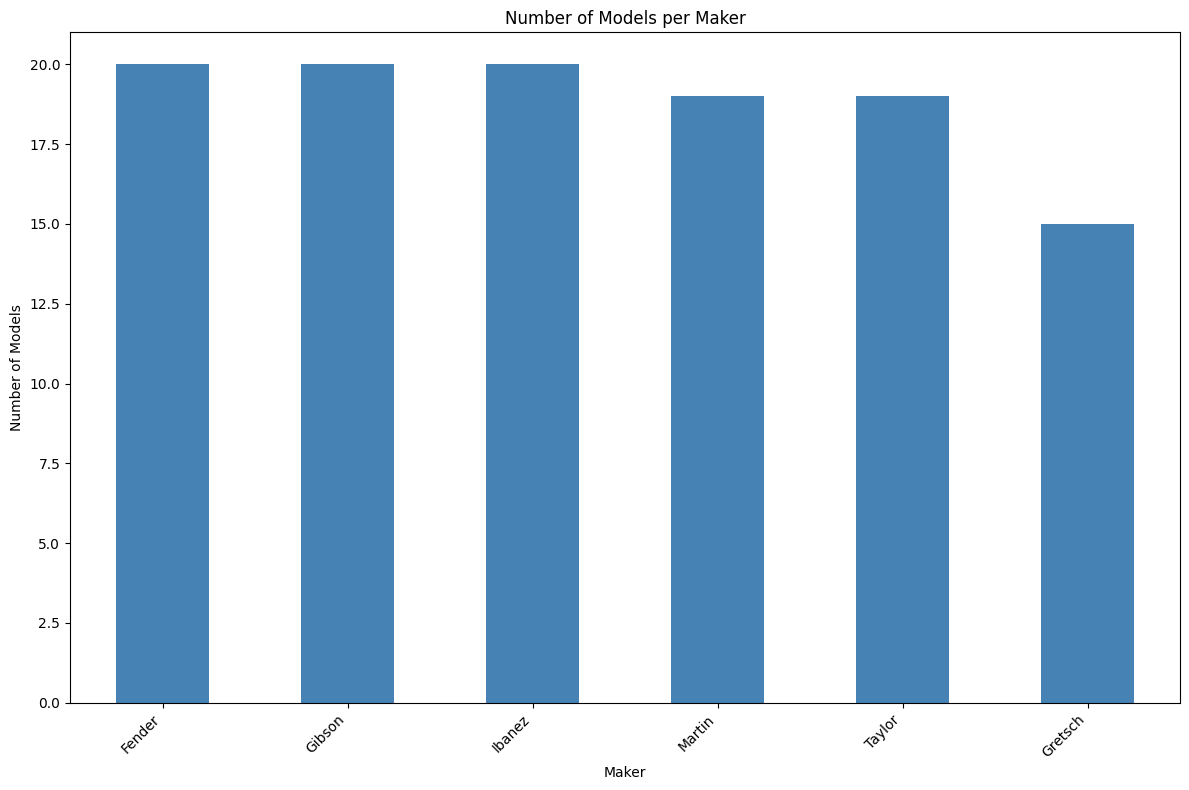

In [ ]:
import matplotlib.pyplot as plt

# Count the number of models for each maker
models_per_maker = data['Maker'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 8))
models_per_maker.plot(kind='bar', color='steelblue')
plt.title('Number of Models per Maker')
plt.xlabel('Maker')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

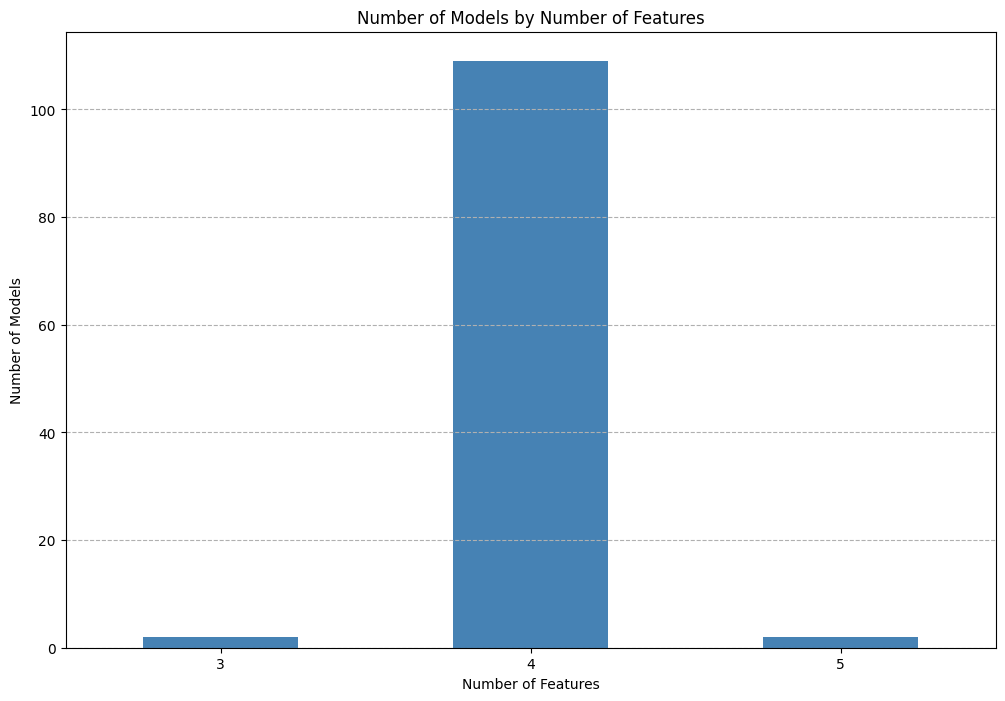

In [ ]:
feature_columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']

# Replace empty strings with NaN for accurate counting
data[feature_columns] = data[feature_columns].replace('', pd.NA)

# Count the number of non-null features per model
data['Number_of_Features'] = data[feature_columns].notna().sum(axis=1)

# Create a bar chart of the number of features
plt.figure(figsize=(12, 8))
data['Number_of_Features'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Number of Models by Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Number of Models')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

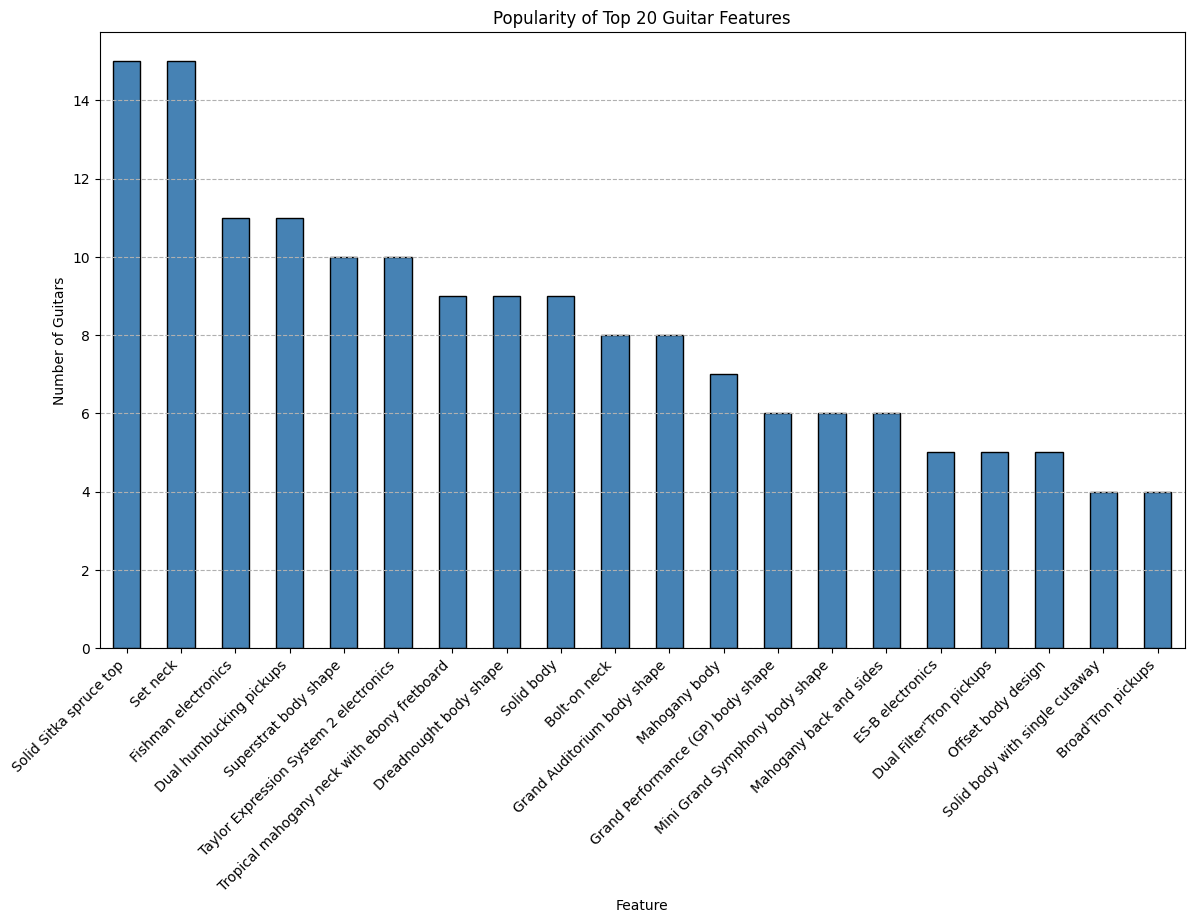

In [ ]:
all_features = []

# Iterate over each feature column and aggregate features
for column in feature_columns:
    features = data[column].dropna()  # Remove NaN values
    all_features.extend(features)

# Create a DataFrame to count occurrences of each feature
feature_series = pd.Series(all_features).value_counts().head(20)

# Plot the data
plt.figure(figsize=(14, 8))
feature_series.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Popularity of Top 20 Guitar Features')
plt.xlabel('Feature')
plt.ylabel('Number of Guitars')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

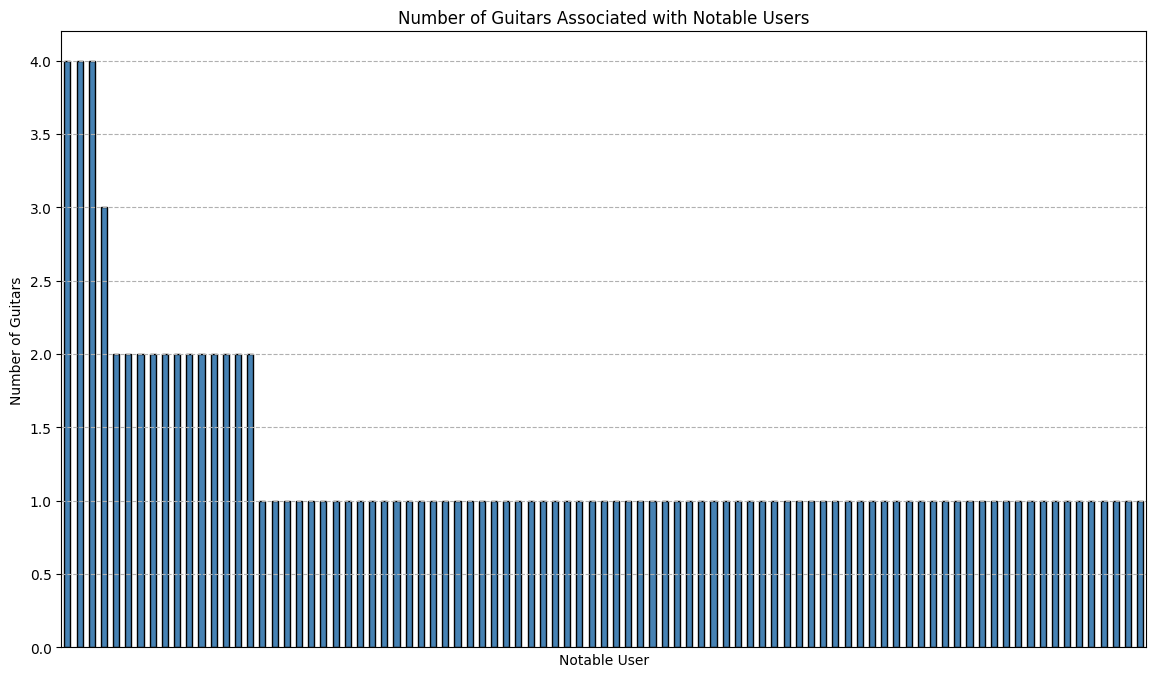

In [ ]:
notable_user_columns = ['NotableUser1', 'NotableUser2', 'NotableUser3']

# Create a list to hold all notable users
all_notable_users = []

# Iterate over each notable user column and aggregate notable users
for column in notable_user_columns:
    # Drop empty strings and NaN values, then extend the list
    notable_users = data[column].replace('', pd.NA).dropna()
    all_notable_users.extend(notable_users)

# Create a DataFrame to count occurrences of each notable user
notable_user_series = pd.Series(all_notable_users).value_counts()

# Plot the data
plt.figure(figsize=(14, 8))
notable_user_series.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Guitars Associated with Notable Users')
plt.xlabel('Notable User')
plt.ylabel('Number of Guitars')
plt.xticks([])
plt.grid(axis='y', linestyle='--')
plt.show()

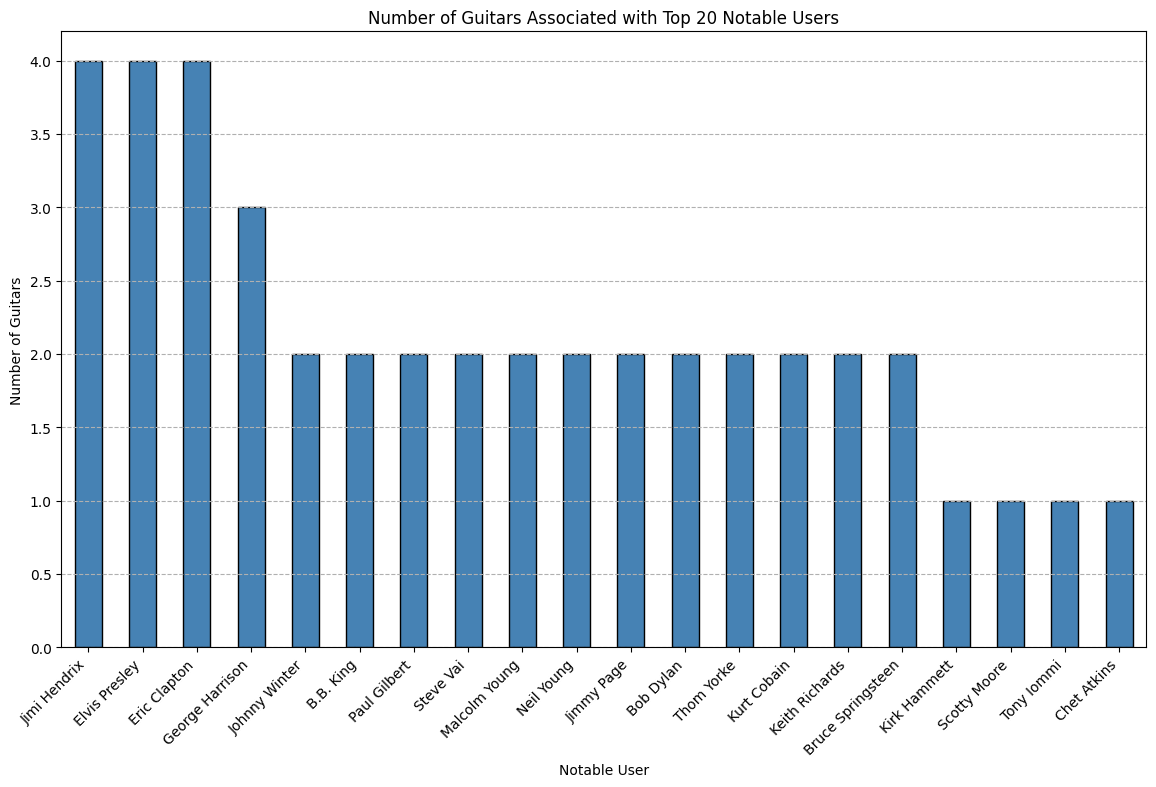

In [ ]:
notable_user_series = pd.Series(all_notable_users).value_counts().head(20)

# Plot the data
plt.figure(figsize=(14, 8))
notable_user_series.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Guitars Associated with Top 20 Notable Users')
plt.xlabel('Notable User')
plt.ylabel('Number of Guitars')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

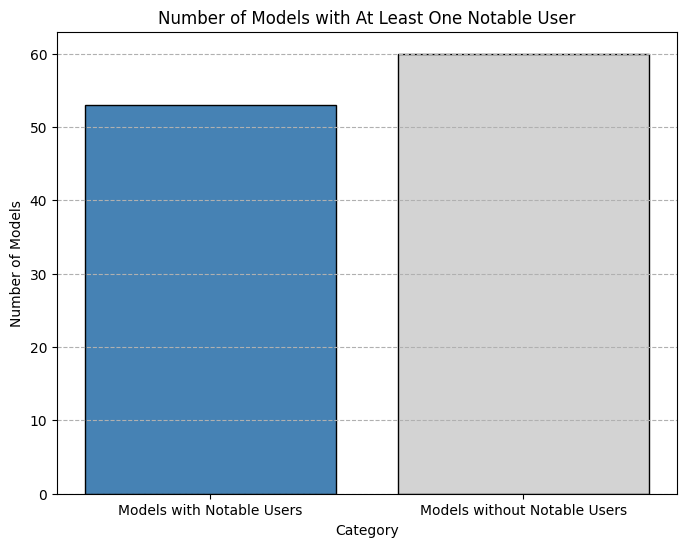

In [ ]:
data.replace('', np.nan, inplace=True)

# Create a column to check if a model has at least one notable user
data['HasNotableUser'] = data[notable_user_columns].notna().any(axis=1)

# Count the number of models with at least one notable user
models_with_notable_users_count = data['HasNotableUser'].sum()

# Count the number of models with notable users
models_with_notable_users = data[data['HasNotableUser']].shape[0]

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(['Models with Notable Users', 'Models without Notable Users'],
        [models_with_notable_users, len(data) - models_with_notable_users],
        color=['steelblue', 'lightgray'],
        edgecolor='black')

plt.title('Number of Models with At Least One Notable User')
plt.xlabel('Category')
plt.ylabel('Number of Models')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()

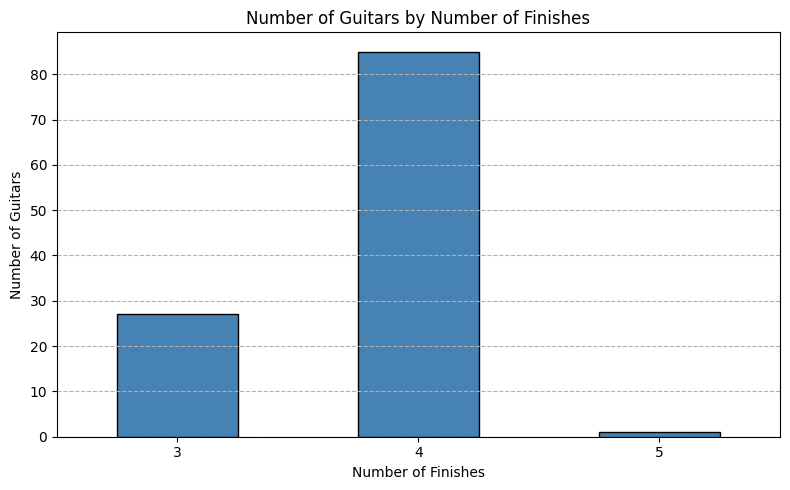

In [ ]:
data['Number_of_Finishes'] = data[['Finish1', 'Finish2', 'Finish3', 'Finish4', 'Finish5']].notna().sum(axis=1)

# Count the number of guitars with 3, 4, and 5 finishes
finish_counts = data['Number_of_Finishes'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 5))
finish_counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Number of Guitars by Number of Finishes')
plt.xlabel('Number of Finishes')
plt.ylabel('Number of Guitars')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

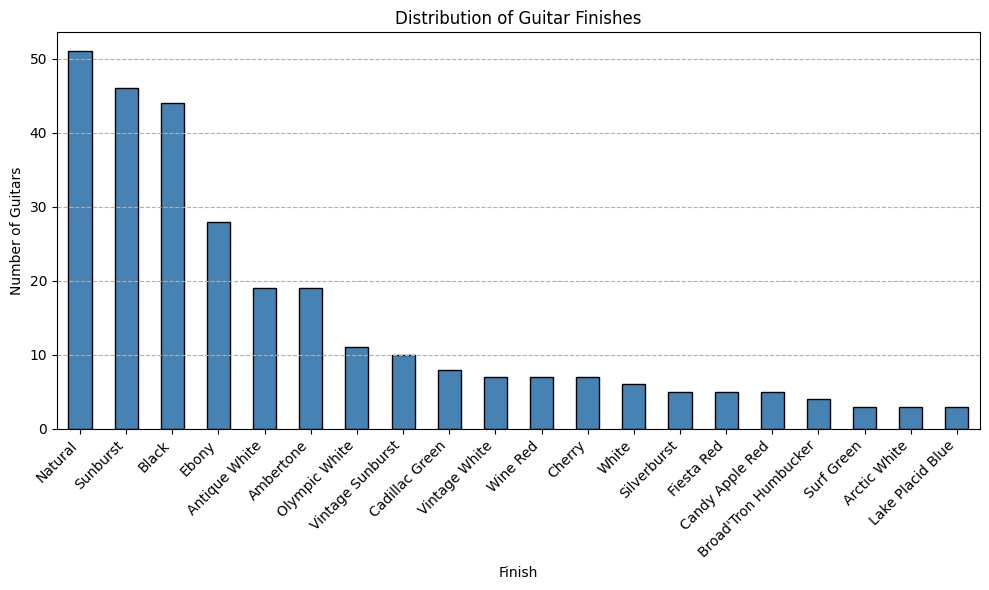

In [ ]:
finish_columns = ['Finish1', 'Finish2', 'Finish3', 'Finish4', 'Finish5']

# Create a series of all finishes
all_finishes = pd.concat([data[col] for col in finish_columns])

# Drop NaN values and count occurrences of each finish
finish_counts = all_finishes.dropna().value_counts().head(20)

# Plot the distribution
plt.figure(figsize=(10, 6))
finish_counts.plot(kind='bar', color='steelblue', edgecolor='black')

plt.title('Distribution of Guitar Finishes')
plt.xlabel('Finish')
plt.ylabel('Number of Guitars')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

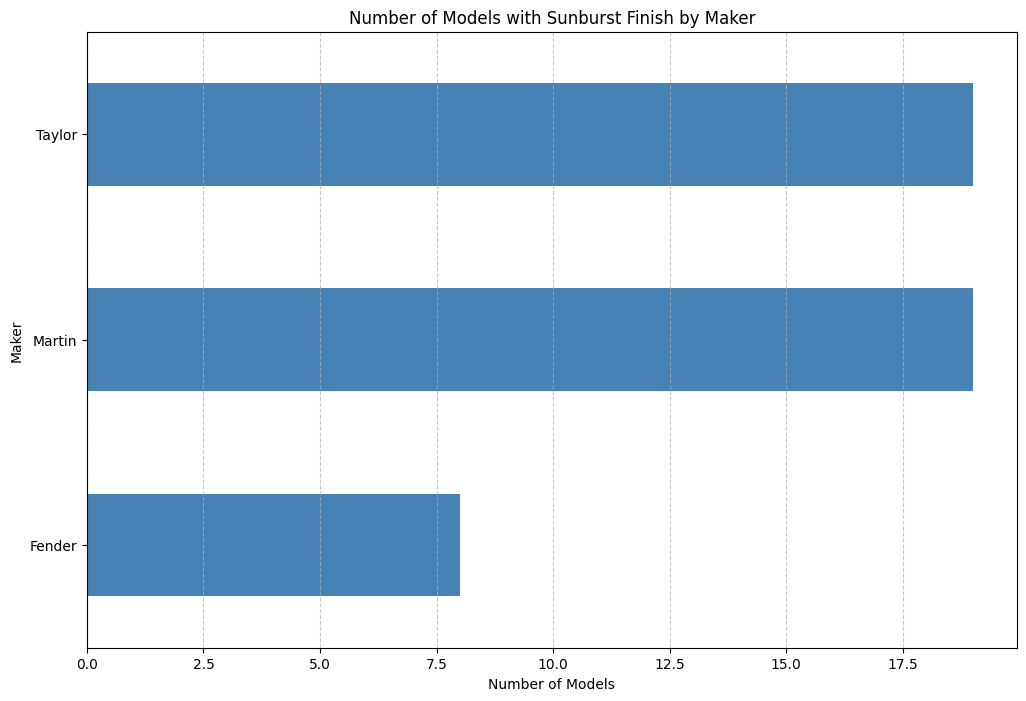

In [ ]:
sunburst_models = data[data[['Finish1', 'Finish2', 'Finish3', 'Finish4', 'Finish5']].apply(lambda x: 'Sunburst' in x.values, axis=1)]

# Group by 'Maker' and count the number of models
sunburst_counts = sunburst_models.groupby('Maker').size()

# Plot the results
plt.figure(figsize=(12, 8))
sunburst_counts.sort_values().plot(kind='barh', color='steelblue')
plt.title('Number of Models with Sunburst Finish by Maker')
plt.xlabel('Number of Models')
plt.ylabel('Maker')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
fender_guitars = data[data['Maker'] == 'Fender']

# Filter for models with 'Sunburst' as a finish
fender_sunburst = fender_guitars[fender_guitars[['Finish1', 'Finish2', 'Finish3', 'Finish4', 'Finish5']].apply(lambda x: 'Sunburst' in x.values, axis=1)]

# Select only the columns for model names and finishes
fender_sunburst_subset = fender_sunburst[['Model', 'Finish1', 'Finish2', 'Finish3', 'Finish4', 'Finish5']].fillna('')
fender_sunburst_subset
# Display the subset
fender_sunburst_subset.head(20)

,Model,Finish1,Finish2,Finish3,Finish4,Finish5
6,Jaguar,Sunburst,Candy Apple Red,Olympic White,Surf Green,
7,Jazz Bass (J-Bass),Sunburst,Olympic White,Black,Natural,
8,Jazzmaster,Sunburst,Olympic White,Surf Green,Candy Apple Red,
10,Lead,Sunburst,Black,Olympic White,,
11,Marauder,Olympic White,Black,Sunburst,,
14,Precision Bass (P-Bass),Sunburst,Olympic White,Black,Candy Apple Red,
17,Stratocaster,Sunburst,Olympic White,Black,Surf Green,Fiesta Red
18,Telecaster,Butterscotch Blonde,Black,Sunburst,Arctic White,


In [ ]:
stratocaster_record = data[(data['Maker'] == 'Fender') & (data['Model'] == 'Stratocaster')]

# Check if the record exists
if not stratocaster_record.empty:
    # Extract the first record (assuming there's only one)
    record = stratocaster_record.iloc[0]

    # Format and print the fields
    print(f"Maker: {record['Maker']}")
    print(f"Model: {record['Model']}")
    print(f"Introduced: {record['Introduced']}")
    print(f"Notable Users: {record['NotableUser1']}, {record['NotableUser2']}, {record['NotableUser3']}")
    print(f"Features: {record['Feature1']}, {record['Feature2']}, {record['Feature3']}, {record['Feature4']}, {record['Feature5']}")
    print(f"Popularity: {record['Popularity']}")
    print(f"Dates: {record['Dates']}")
    print(f"Finishes: {record['Finish1']}, {record['Finish2']}, {record['Finish3']}, {record['Finish4']}, {record['Finish5']}")
else:
    print("No record found for the Fender Stratocaster.")

Maker: Fender
Model: Stratocaster
Introduced: 1954
Notable Users: Jimi Hendrix, Eric Clapton, David Gilmour
Features: Three single-coil pickups, Contoured body for comfort, Tremolo (vibrato) bridge, Bolt-on neck, 5-way switch for pickup selection
Popularity: One of the best-selling and most iconic electric guitars in history.
Dates: 1954 - Present
Finishes: Sunburst, Olympic White, Black, Surf Green, Fiesta Red


BASS GUITAR DATASET:

In [4]:
import numpy as np;
import pandas as pd;

In [5]:
data = pd.read_csv('Bass_Guitar.csv')

data = data.fillna('')

data.head()

,Maker,Model,Introduced,Notable User 1,Notable User 2,Notable User 3,Feature 1,Feature 2,Feature 3,Feature 4,Popularity,Dates,Finish 1,Finish 2,Finish 3,Finish 4
0,Fender,Precision Bass,1951,James Jamerson,Sting,Pino Palladino,Split-Coil Pickup,Thick-Neck Profile,Simple Controls,Passive Electronics,10,1951-Present,Sunburst,Black,Olympic White,Natural
1,Fender,Jazz Bass,1960,Jaco Pastorius,Geddy Lee,Marcus Miller,Dual- Single-Coil Pickups,Slim-Neck Profile,Versatile Tones,Passive/Active Options,10,1960-Present,Sunburst,Lake Placid Blue,Black,Olympic White
2,Gibson,EB-0,1959,Jack Bruce,Andy Fraser,Glenn Cornick,Mudbucker pickup,Short Scale,"Warm, Thick Tone",Mahogany Body,7,1959-1972,Cherry,Black,Walnut,Natural
3,Gibson,Thunderbird,1963,Nikki Sixx,John Entwistle,Krist Novoselic,Humbucker Pickups,Neck-Through Design,Offset Body,High Sustain,8,1963-Present,Sunburst,Ebony,Vintage Sunburst,Tobacco Burst
4,Rickenbacker,4001,1961,Paul McCartney,Geddy Lee,Chris Squire,Horseshoe Pickup,Neck-Through Design,Stereo Output,Distinctive Tone,9,1961-1981,Fireglo,Jetglo,Mapleglo,Midnight Blue


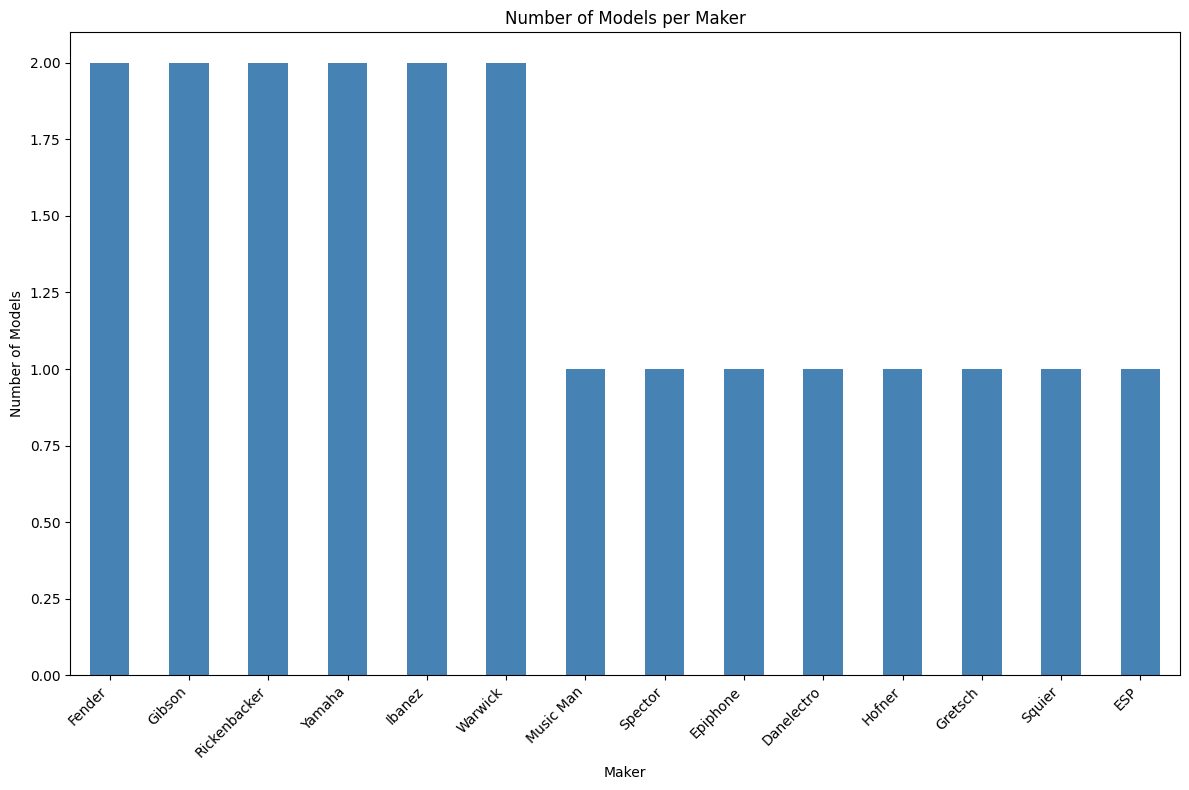

In [6]:
import matplotlib.pyplot as plt

# Count the number of models for each maker
models_per_maker = data['Maker'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 8))
models_per_maker.plot(kind='bar', color='steelblue')
plt.title('Number of Models per Maker')
plt.xlabel('Maker')
plt.ylabel('Number of Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
import matplotlib.pyplot as plt
import pandas as pd



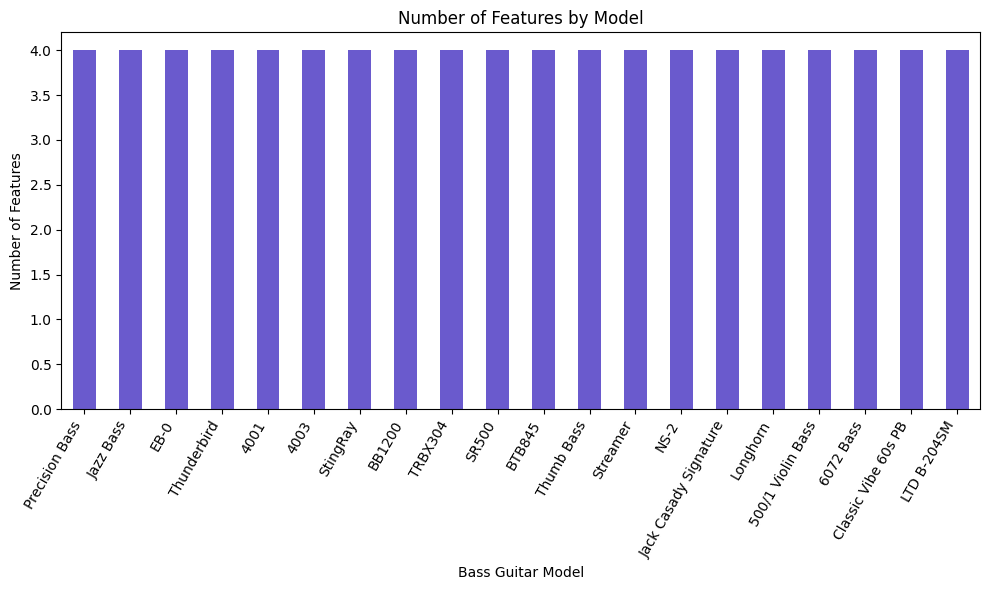

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("Bass_Guitar.csv")

# Count the number of non-null features for each model
data['Feature Count'] = data[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].notnull().sum(axis=1)

# Set the model as the index to display each model's feature count
feature_count_by_model = data.set_index('Model')['Feature Count']

# Plot the feature count by model
plt.figure(figsize=(10, 6))
feature_count_by_model.plot(kind='bar', color='slateblue')
plt.title('Number of Features by Model')
plt.xlabel('Bass Guitar Model')
plt.ylabel('Number of Features')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



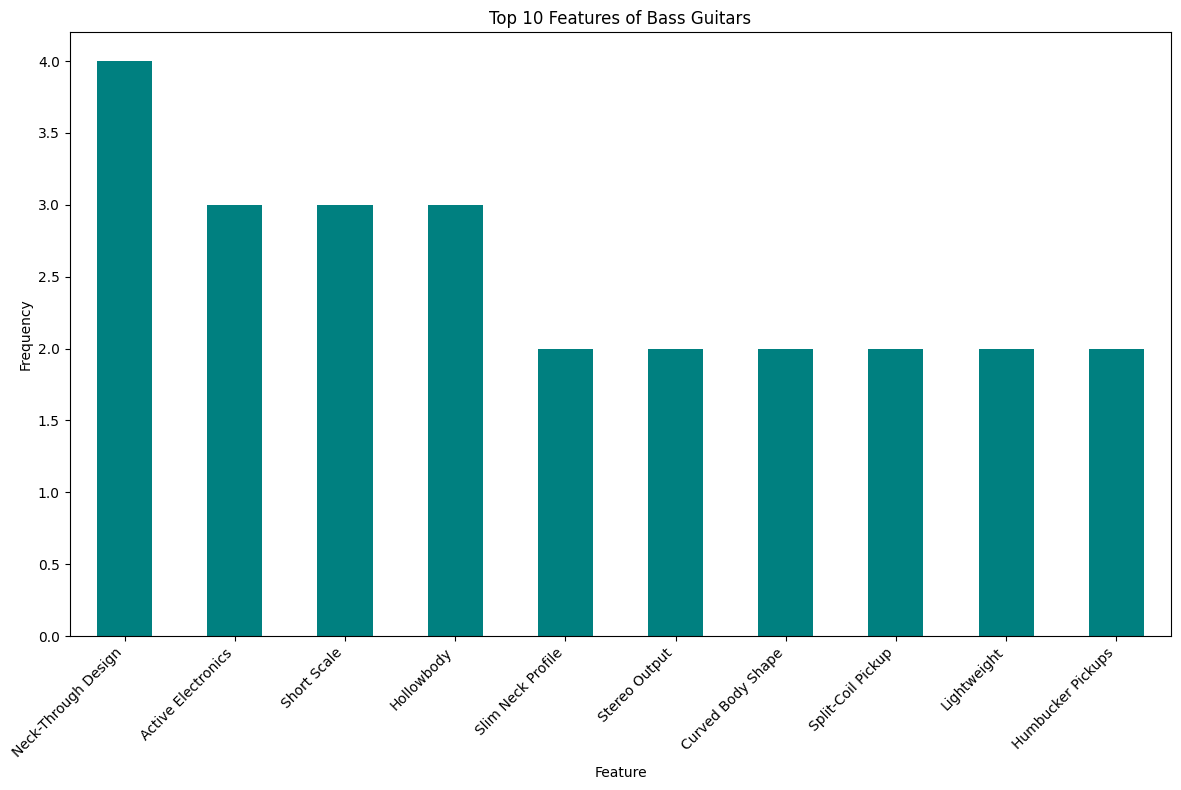

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("Bass_Guitar.csv")

# Combine all feature columns into a single Series for counting
all_features = pd.concat([data['Feature 1'], data['Feature 2'], data['Feature 3'], data['Feature 4']])

# Count the occurrences of each unique feature
feature_counts = all_features.value_counts()

# Get the top 10 most common features
top_10_features = feature_counts.head(10)

# Plot the top 10 features
plt.figure(figsize=(12, 8))
top_10_features.plot(kind='bar', color='teal')
plt.title('Top 10 Features of Bass Guitars')
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


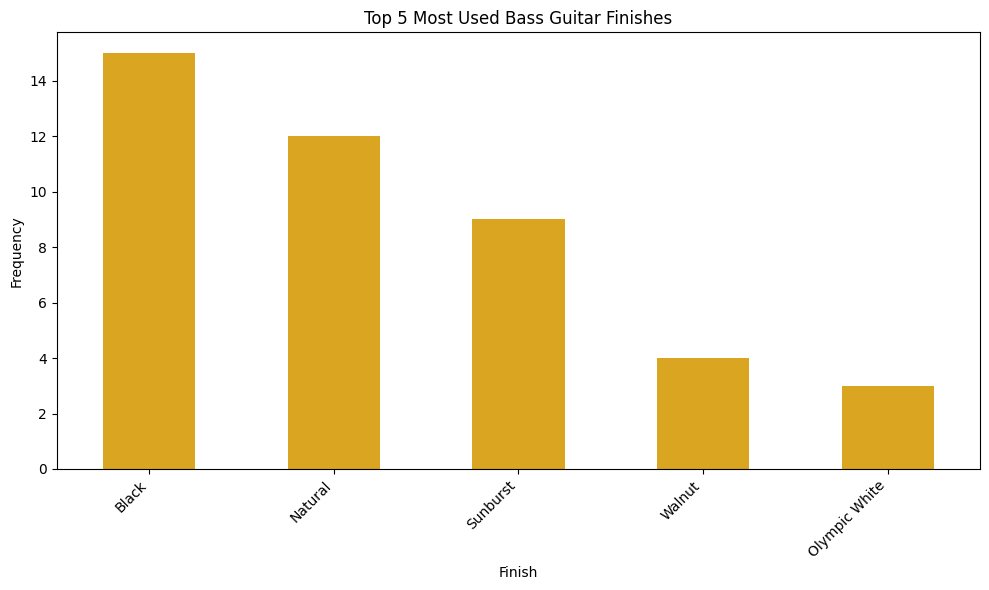

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("Bass_Guitar.csv")

# Combine all finish columns into a single Series for counting
all_finishes = pd.concat([data['Finish 1'], data['Finish 2'], data['Finish 3'], data['Finish 4']])

# Count the occurrences of each finish
finish_counts = all_finishes.value_counts()

# Get the top 5 most common finishes
top_5_finishes = finish_counts.head(5)

# Plot the top 5 finishes
plt.figure(figsize=(10, 6))
top_5_finishes.plot(kind='bar', color='goldenrod')
plt.title('Top 5 Most Used Bass Guitar Finishes')
plt.xlabel('Finish')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



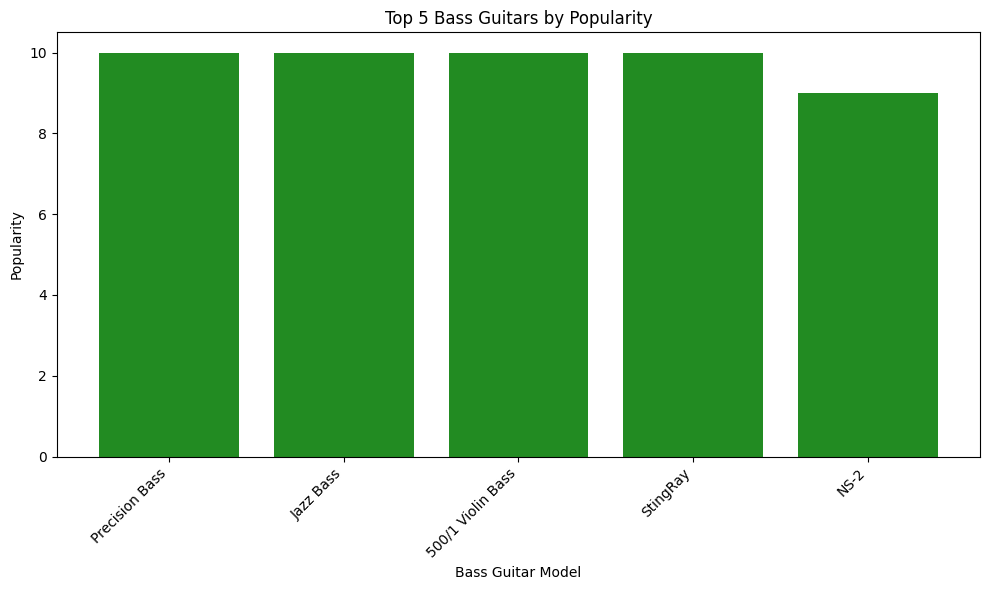

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv("Bass_Guitar.csv")

# Sort the dataset by popularity (assuming the 'Popularity' column exists)
top_5_popularity = data[['Model', 'Popularity']].sort_values(by='Popularity', ascending=False).head(5)

# Plot the top 5 models based on popularity
plt.figure(figsize=(10, 6))
plt.bar(top_5_popularity['Model'], top_5_popularity['Popularity'], color='forestgreen')
plt.title('Top 5 Bass Guitars by Popularity')
plt.xlabel('Bass Guitar Model')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
